# Hyperparameter Tuning Experiments

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error

In [46]:
df = pd.read_csv('bodyPerformance.csv') 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


## 1. Data Import and Cleaning

### 1.1 Classification Dataset (bodyPerformance.csv)

In [48]:
df_classification = df.copy()
df_classification.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [49]:
print("Missing values in classification dataset:")
print(df_classification.isnull().sum())

Missing values in classification dataset:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


In [50]:
le = LabelEncoder()
df_classification['gender'] = le.fit_transform(df_classification['gender'])
df_classification['class'] = le.fit_transform(df_classification['class'])

scaler = StandardScaler()
numerical_cols = df_classification.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('class') if 'class' in numerical_cols else numerical_cols
df_classification[numerical_cols] = scaler.fit_transform(df_classification[numerical_cols])

X_class = df_classification.drop('class', axis=1)
y_class = df_classification['class']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print(f"Training set shape: {X_class_train.shape}")
print(f"Test set shape: {X_class_test.shape}")

Training set shape: (10714, 11)
Test set shape: (2679, 11)


### 1.2 Regression Dataset

We'll use the California Housing dataset for our regression tasks

In [51]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df_regression = pd.DataFrame(housing.data, columns=housing.feature_names)
df_regression['target'] = housing.target

df_regression.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
print("Missing values in regression dataset:")
print(df_regression.isnull().sum())

Missing values in regression dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [53]:
scaler = StandardScaler()
numerical_cols = df_regression.columns.drop('target')
df_regression[numerical_cols] = scaler.fit_transform(df_regression[numerical_cols])

X_reg = df_regression.drop('target', axis=1)
y_reg = df_regression['target']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"Training set shape: {X_reg_train.shape}")
print(f"Test set shape: {X_reg_test.shape}")

Training set shape: (16512, 8)
Test set shape: (4128, 8)


## 2. KNN Hyperparameter Tuning

### 2.1 KNN Classification - Number of neighbors vs Accuracy

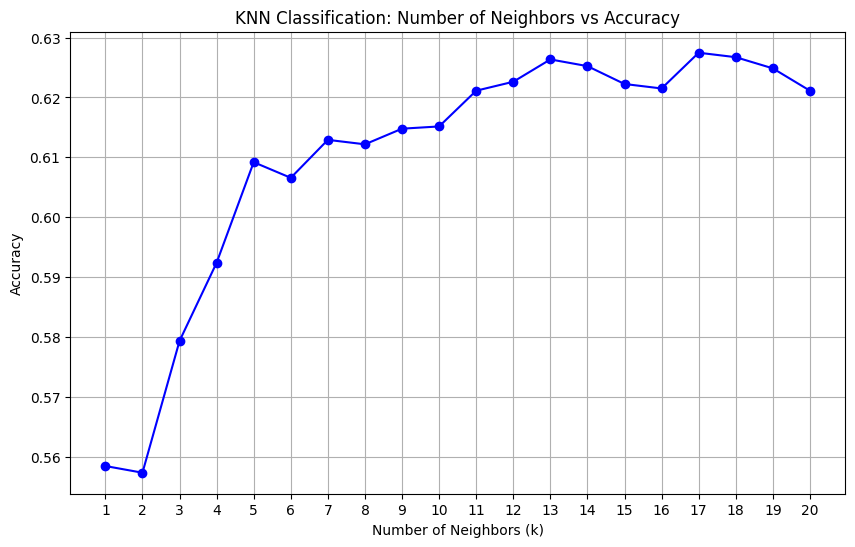

Best k value: 17 with accuracy: 0.6275


In [54]:
n_neighbors = list(range(1, 21))  
accuracy_scores = []

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_class_train, y_class_train)
    y_pred = knn.predict(X_class_test)
    accuracy = accuracy_score(y_class_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Classification: Number of Neighbors vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(n_neighbors)
plt.show()

best_k = n_neighbors[accuracy_scores.index(max(accuracy_scores))]
print(f"Best k value: {best_k} with accuracy: {max(accuracy_scores):.4f}")

**Conclusion:** 

The line plot above shows how the accuracy of the KNN classifier changes with different numbers of neighbors. Initially, with a small number of neighbors, we might see higher accuracy but with potential overfitting. As k increases, the model becomes more generalized, which may lead to either improved or decreased accuracy depending on the dataset's characteristics. The optimal value of k is identified where the accuracy peaks, representing the best balance between bias and variance.

### 2.2 KNN Regression - Number of neighbors vs MSE

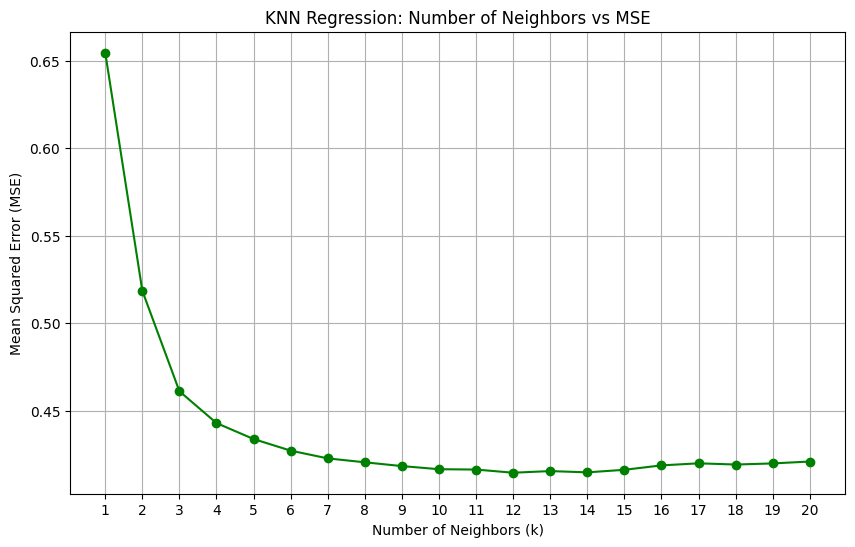

Best k value: 12 with MSE: 0.4146


In [55]:
n_neighbors = list(range(1, 21)) 
mse_scores = []

for n in n_neighbors:
    knn_reg = KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_reg_train, y_reg_train)
    y_pred = knn_reg.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mse_scores, marker='o', linestyle='-', color='g')
plt.title('KNN Regression: Number of Neighbors vs MSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(n_neighbors)
plt.show()

best_k = n_neighbors[mse_scores.index(min(mse_scores))]
print(f"Best k value: {best_k} with MSE: {min(mse_scores):.4f}")

**Conclusion:** 

For KNN regression, the MSE plot demonstrates how prediction error varies with different numbers of neighbors. Unlike classification where we aim to maximize accuracy, here we want to minimize MSE. With a smaller k, the model might overfit, leading to good performance on training data but poor generalization. As k increases, the model becomes more stable but might miss local patterns. The optimal number of neighbors is where MSE reaches its minimum value, indicating the best trade-off between model complexity and prediction performance.

## 3. Decision Tree Hyperparameter Tuning

### 3.1 Decision Tree Classifier - max_depth vs max_features (criterion = gini)

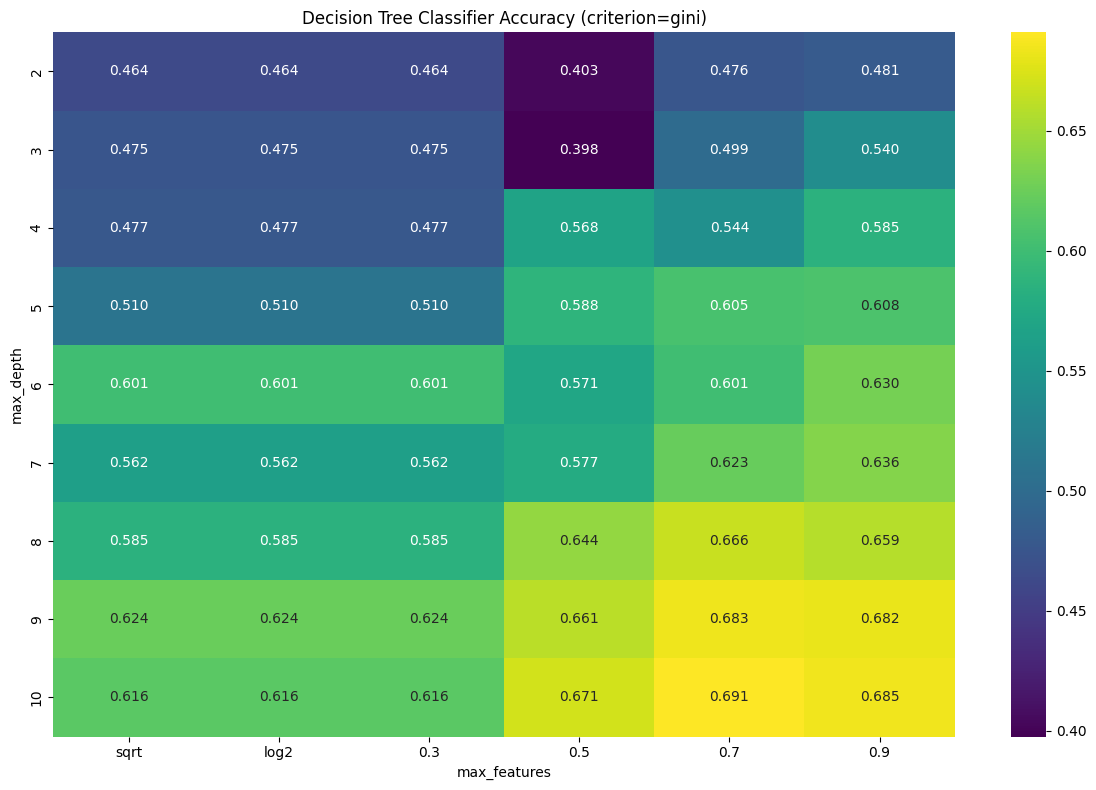

Best hyperparameters: max_depth=10, max_features=0.7
Best accuracy: 0.6909


In [56]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
max_features_options = ['sqrt', 'log2', 0.3, 0.5, 0.7, 0.9]

accuracy_matrix_gini = np.zeros((len(max_depths), len(max_features_options)))

for i, depth in enumerate(max_depths):
    for j, max_feat in enumerate(max_features_options):
        dt = DecisionTreeClassifier(max_depth=depth, max_features=max_feat, criterion='gini', random_state=42)
        dt.fit(X_class_train, y_class_train)
        y_pred = dt.predict(X_class_test)
        accuracy = accuracy_score(y_class_test, y_pred)
        accuracy_matrix_gini[i, j] = accuracy

plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_matrix_gini, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=max_features_options, yticklabels=max_depths)
plt.title('Decision Tree Classifier Accuracy (criterion=gini)')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()

best_idx = np.unravel_index(np.argmax(accuracy_matrix_gini), accuracy_matrix_gini.shape)
best_max_depth = max_depths[best_idx[0]]
best_max_features = max_features_options[best_idx[1]]
best_accuracy = accuracy_matrix_gini[best_idx]
print(f"Best hyperparameters: max_depth={best_max_depth}, max_features={best_max_features}")
print(f"Best accuracy: {best_accuracy:.4f}")

**Conclusion:** 

The heatmap for the Decision Tree Classifier using the gini criterion reveals how model accuracy varies with different combinations of max_depth and max_features. Deeper trees (higher max_depth) typically capture more complex patterns but risk overfitting, while restricting the features considered at each split (max_features) can help create more diverse trees. The optimal combination provides a balance between model complexity and generalization ability, with the best accuracy shown in the brighter regions of the heatmap.

### 3.2 Decision Tree Classifier - max_depth vs max_features (criterion = entropy)

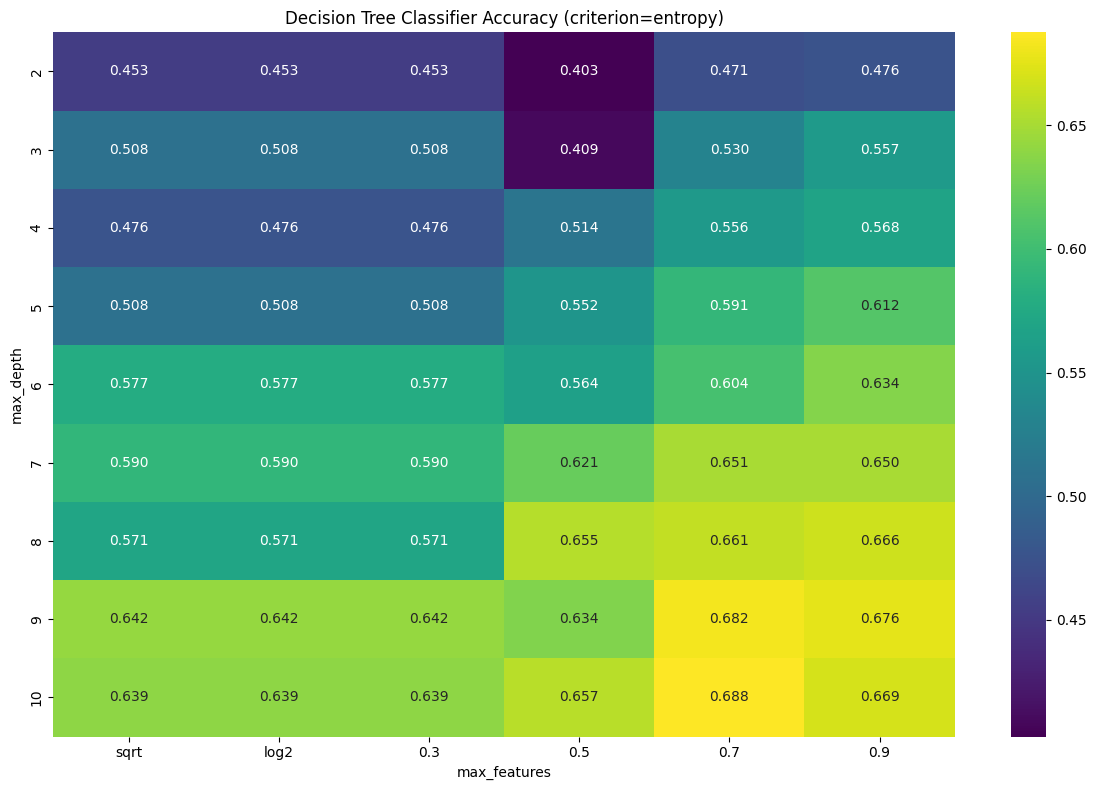

Best hyperparameters: max_depth=10, max_features=0.7
Best accuracy: 0.6876

Comparing gini and entropy criteria:
Best accuracy with gini: 0.6909
Best accuracy with entropy: 0.6876


In [57]:
accuracy_matrix_entropy = np.zeros((len(max_depths), len(max_features_options)))

for i, depth in enumerate(max_depths):
    for j, max_feat in enumerate(max_features_options):
        dt = DecisionTreeClassifier(max_depth=depth, max_features=max_feat, criterion='entropy', random_state=42)
        dt.fit(X_class_train, y_class_train)
        y_pred = dt.predict(X_class_test)
        accuracy = accuracy_score(y_class_test, y_pred)
        accuracy_matrix_entropy[i, j] = accuracy

plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_matrix_entropy, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=max_features_options, yticklabels=max_depths)
plt.title('Decision Tree Classifier Accuracy (criterion=entropy)')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()

best_idx = np.unravel_index(np.argmax(accuracy_matrix_entropy), accuracy_matrix_entropy.shape)
best_max_depth = max_depths[best_idx[0]]
best_max_features = max_features_options[best_idx[1]]
best_accuracy = accuracy_matrix_entropy[best_idx]
print(f"Best hyperparameters: max_depth={best_max_depth}, max_features={best_max_features}")
print(f"Best accuracy: {best_accuracy:.4f}")

print("\nComparing gini and entropy criteria:")
print(f"Best accuracy with gini: {np.max(accuracy_matrix_gini):.4f}")
print(f"Best accuracy with entropy: {np.max(accuracy_matrix_entropy):.4f}")

**Conclusion:** 

The entropy criterion heatmap for Decision Tree Classifier shows similar patterns to the gini criterion but with potentially different accuracy values. Entropy measures information gain differently than gini impurity, which may lead to different splitting decisions at tree nodes. Comparing the two criteria helps identify which impurity measure works better for this specific classification task. The differences in performance can provide insights into the nature of the dataset and guide the selection of the most appropriate criterion.

### 3.3 Decision Tree Regressor - max_depth vs max_features (criterion = friedman_mse)

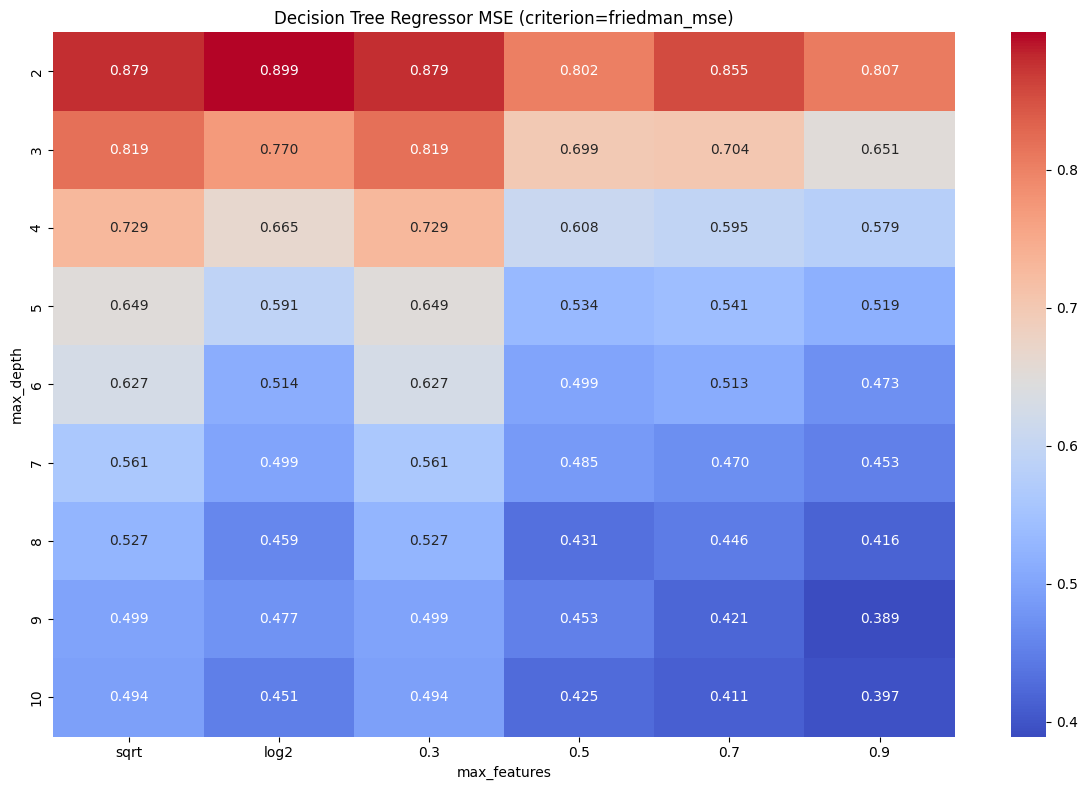

Best hyperparameters: max_depth=9, max_features=0.9
Best MSE: 0.3893


In [58]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
max_features_options = ['sqrt', 'log2', 0.3, 0.5, 0.7, 0.9]

mse_matrix_friedman = np.zeros((len(max_depths), len(max_features_options)))

for i, depth in enumerate(max_depths):
    for j, max_feat in enumerate(max_features_options):
        dt_reg = DecisionTreeRegressor(max_depth=depth, max_features=max_feat, criterion='friedman_mse', random_state=42)
        dt_reg.fit(X_reg_train, y_reg_train)
        y_pred = dt_reg.predict(X_reg_test)
        mse = mean_squared_error(y_reg_test, y_pred)
        mse_matrix_friedman[i, j] = mse

plt.figure(figsize=(12, 8))
sns.heatmap(mse_matrix_friedman, annot=True, fmt='.3f', cmap='coolwarm',
            xticklabels=max_features_options, yticklabels=max_depths)
plt.title('Decision Tree Regressor MSE (criterion=friedman_mse)')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()

best_idx = np.unravel_index(np.argmin(mse_matrix_friedman), mse_matrix_friedman.shape)
best_max_depth = max_depths[best_idx[0]]
best_max_features = max_features_options[best_idx[1]]
best_mse = mse_matrix_friedman[best_idx]
print(f"Best hyperparameters: max_depth={best_max_depth}, max_features={best_max_features}")
print(f"Best MSE: {best_mse:.4f}")

**Conclusion:** 

The heatmap for Decision Tree Regressor with friedman_mse criterion shows how MSE varies across different combinations of max_depth and max_features. Unlike classification where we aim for higher accuracy, in regression we want lower MSE values (darker regions in this heatmap with coolwarm colormap). The friedman_mse criterion is specifically designed to improve the quality of splits for regression problems. Increasing tree depth typically reduces MSE up to a certain point, after which overfitting may occur, leading to worse performance on test data. The optimal combination of hyperparameters represents the best balance between model complexity and prediction performance.

### 3.4 Decision Tree Regressor - max_depth vs max_features (criterion = poisson)

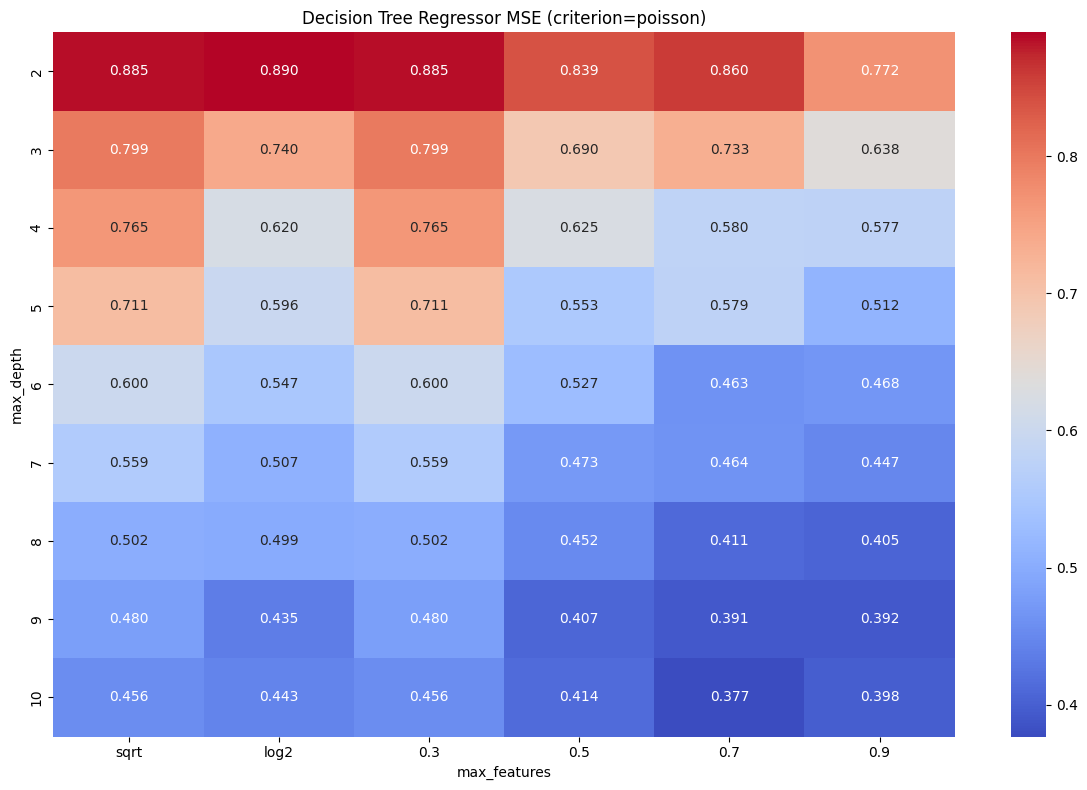

Best hyperparameters: max_depth=10, max_features=0.7
Best MSE: 0.3766

Comparing friedman_mse and poisson criteria:
Best MSE with friedman_mse: 0.3893
Best MSE with poisson: 0.3766


In [59]:
mse_matrix_poisson = np.zeros((len(max_depths), len(max_features_options)))

for i, depth in enumerate(max_depths):
    for j, max_feat in enumerate(max_features_options):
        dt_reg = DecisionTreeRegressor(max_depth=depth, max_features=max_feat, criterion='poisson', random_state=42)
        dt_reg.fit(X_reg_train, y_reg_train)
        y_pred = dt_reg.predict(X_reg_test)
        mse = mean_squared_error(y_reg_test, y_pred)
        mse_matrix_poisson[i, j] = mse

plt.figure(figsize=(12, 8))
sns.heatmap(mse_matrix_poisson, annot=True, fmt='.3f', cmap='coolwarm',
            xticklabels=max_features_options, yticklabels=max_depths)
plt.title('Decision Tree Regressor MSE (criterion=poisson)')
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()

best_idx = np.unravel_index(np.argmin(mse_matrix_poisson), mse_matrix_poisson.shape)
best_max_depth = max_depths[best_idx[0]]
best_max_features = max_features_options[best_idx[1]]
best_mse = mse_matrix_poisson[best_idx]
print(f"Best hyperparameters: max_depth={best_max_depth}, max_features={best_max_features}")
print(f"Best MSE: {best_mse:.4f}")

print("\nComparing friedman_mse and poisson criteria:")
print(f"Best MSE with friedman_mse: {np.min(mse_matrix_friedman):.4f}")
print(f"Best MSE with poisson: {np.min(mse_matrix_poisson):.4f}")

## 4. Random Forest Hyperparameter Tuning

### 4.1 Random Forest Classifier - n_estimators vs accuracy for different criteria

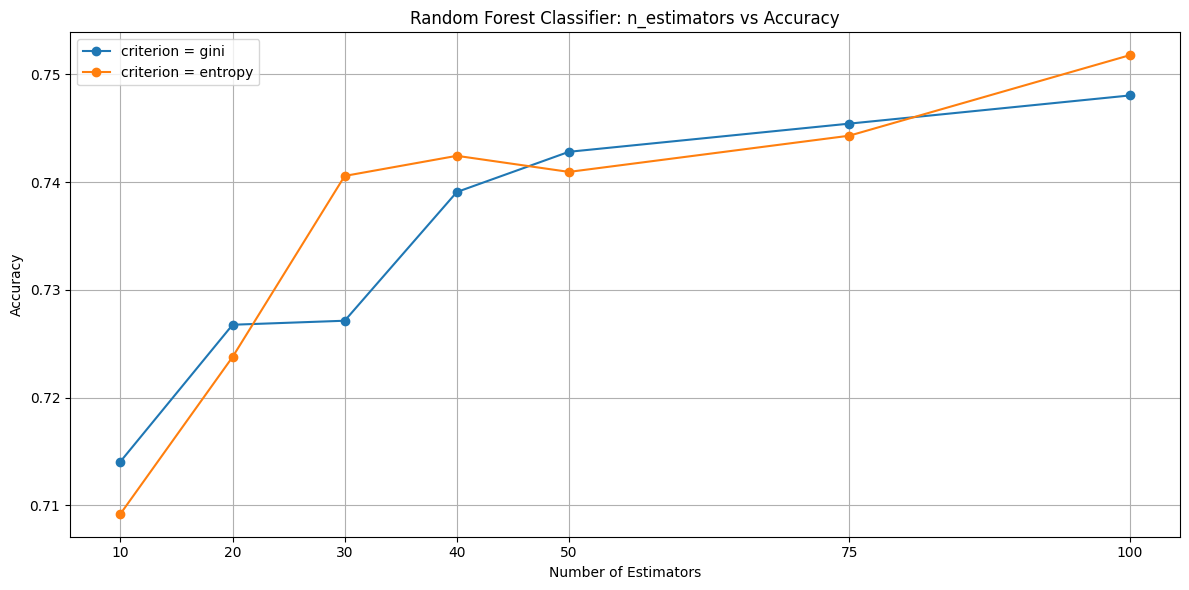

Best for gini: n_estimators=100, accuracy=0.7480
Best for entropy: n_estimators=100, accuracy=0.7518


In [60]:
n_estimators_range = [10, 20, 30, 40, 50, 75, 100]
criteria = ['gini', 'entropy']
accuracy_results = {criterion: [] for criterion in criteria}

for criterion in criteria:
    accuracies = []
    for n_est in n_estimators_range:
        rf_clf = RandomForestClassifier(n_estimators=n_est, criterion=criterion, random_state=42)
        rf_clf.fit(X_class_train, y_class_train)
        y_pred = rf_clf.predict(X_class_test)
        accuracy = accuracy_score(y_class_test, y_pred)
        accuracies.append(accuracy)
    accuracy_results[criterion] = accuracies

plt.figure(figsize=(12, 6))
for criterion, accuracies in accuracy_results.items():
    plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', label=f'criterion = {criterion}')

plt.title('Random Forest Classifier: n_estimators vs Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.xticks(n_estimators_range)
plt.tight_layout()
plt.show()

for criterion, accuracies in accuracy_results.items():
    best_idx = accuracies.index(max(accuracies))
    best_n_est = n_estimators_range[best_idx]
    best_accuracy = accuracies[best_idx]
    print(f"Best for {criterion}: n_estimators={best_n_est}, accuracy={best_accuracy:.4f}")

**Conclusion:** 

The line plot for Random Forest Classifier shows how accuracy changes with the number of trees (n_estimators) for both gini and entropy criteria. Random Forests typically improve with more trees up to a certain point, after which the returns diminish. The comparison between the two criteria reveals which splitting strategy works better for this dataset. Generally, Random Forests are less prone to overfitting than individual Decision Trees due to their ensemble nature, and the plot helps identify the optimal number of trees needed to achieve good performance without unnecessary computational cost.

### 4.2 Random Forest Regressor - n_estimators vs MSE for different criteria

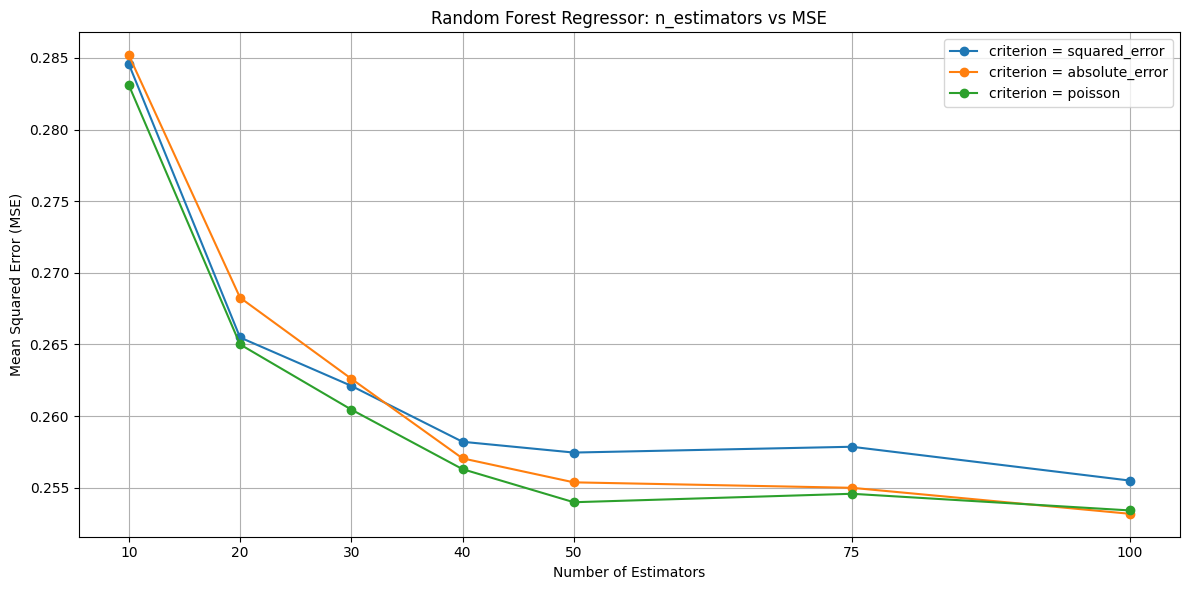

Best for squared_error: n_estimators=100, MSE=0.2555
Best for absolute_error: n_estimators=100, MSE=0.2532
Best for poisson: n_estimators=100, MSE=0.2534


In [61]:
n_estimators_range = [10, 20, 30, 40, 50, 75, 100]
criteria = ['squared_error', 'absolute_error', 'poisson']
mse_results = {criterion: [] for criterion in criteria}

for criterion in criteria:
    mses = []
    for n_est in n_estimators_range:
        rf_reg = RandomForestRegressor(n_estimators=n_est, criterion=criterion, random_state=42)
        rf_reg.fit(X_reg_train, y_reg_train)
        y_pred = rf_reg.predict(X_reg_test)
        mse = mean_squared_error(y_reg_test, y_pred)
        mses.append(mse)
    mse_results[criterion] = mses

plt.figure(figsize=(12, 6))
for criterion, mses in mse_results.items():
    plt.plot(n_estimators_range, mses, marker='o', linestyle='-', label=f'criterion = {criterion}')

plt.title('Random Forest Regressor: n_estimators vs MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.xticks(n_estimators_range)
plt.tight_layout()
plt.show()

for criterion, mses in mse_results.items():
    best_idx = mses.index(min(mses))
    best_n_est = n_estimators_range[best_idx]
    best_mse = mses[best_idx]
    print(f"Best for {criterion}: n_estimators={best_n_est}, MSE={best_mse:.4f}")

**Conclusion:** 

The poisson criterion heatmap for Decision Tree Regressor is particularly useful when the target variable follows a Poisson distribution (count data) or when dealing with non-negative targets. Comparing the MSE results between friedman_mse and poisson criteria reveals which approach is more suitable for our specific regression task. If the poisson criterion shows significantly different performance patterns, it might suggest that the target variable has characteristics that align better with Poisson assumptions, such as being count data where variance increases with the mean.

## 5. Support Vector Machine Hyperparameter Tuning

### 5.1 SVC - C parameter vs accuracy for different kernels

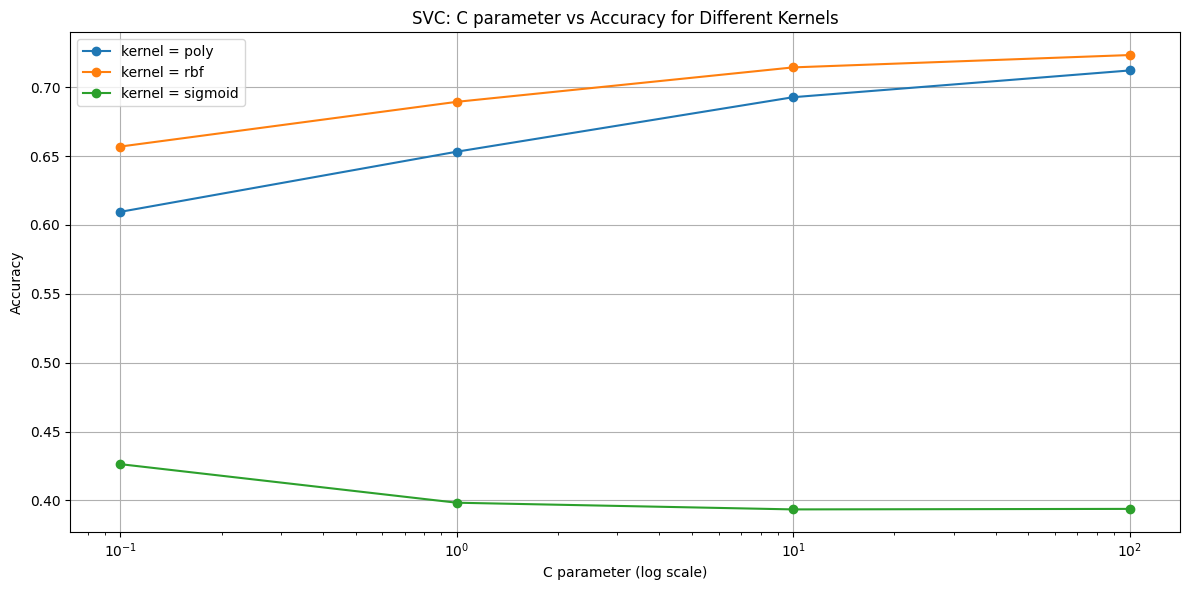

Best for poly: C=100, accuracy=0.7122
Best for rbf: C=100, accuracy=0.7234
Best for sigmoid: C=0.1, accuracy=0.4263


In [62]:
C_range = [0.1, 1, 10, 100]
kernels = ['poly', 'rbf', 'sigmoid']
accuracy_results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    accuracies = []
    for C in C_range:
        svc = SVC(C=C, kernel=kernel, random_state=42)
        svc.fit(X_class_train, y_class_train)
        y_pred = svc.predict(X_class_test)
        accuracy = accuracy_score(y_class_test, y_pred)
        accuracies.append(accuracy)
    accuracy_results[kernel] = accuracies

plt.figure(figsize=(12, 6))
for kernel, accuracies in accuracy_results.items():
    plt.plot(C_range, accuracies, marker='o', linestyle='-', label=f'kernel = {kernel}')

plt.title('SVC: C parameter vs Accuracy for Different Kernels')
plt.xlabel('C parameter (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()

for kernel, accuracies in accuracy_results.items():
    best_idx = accuracies.index(max(accuracies))
    best_C = C_range[best_idx]
    best_accuracy = accuracies[best_idx]
    print(f"Best for {kernel}: C={best_C}, accuracy={best_accuracy:.4f}")

**Conclusion:** 

The SVC plot shows how the C parameter affects classification accuracy for different kernel functions. The C parameter controls the trade-off between having a smooth decision boundary and classifying training points correctly. A lower C value creates a smoother decision boundary but may misclassify more training points, while a higher C value aims to classify all training points correctly but might lead to overfitting. Different kernels transform the feature space in different ways: 'rbf' creates non-linear boundaries based on distance, 'poly' uses polynomial functions, and 'sigmoid' applies a sigmoid function. The optimal C value for each kernel represents the best trade-off between fitting the training data and generalizing to unseen data.

### 5.2 SVR - C parameter vs MSE for different kernels

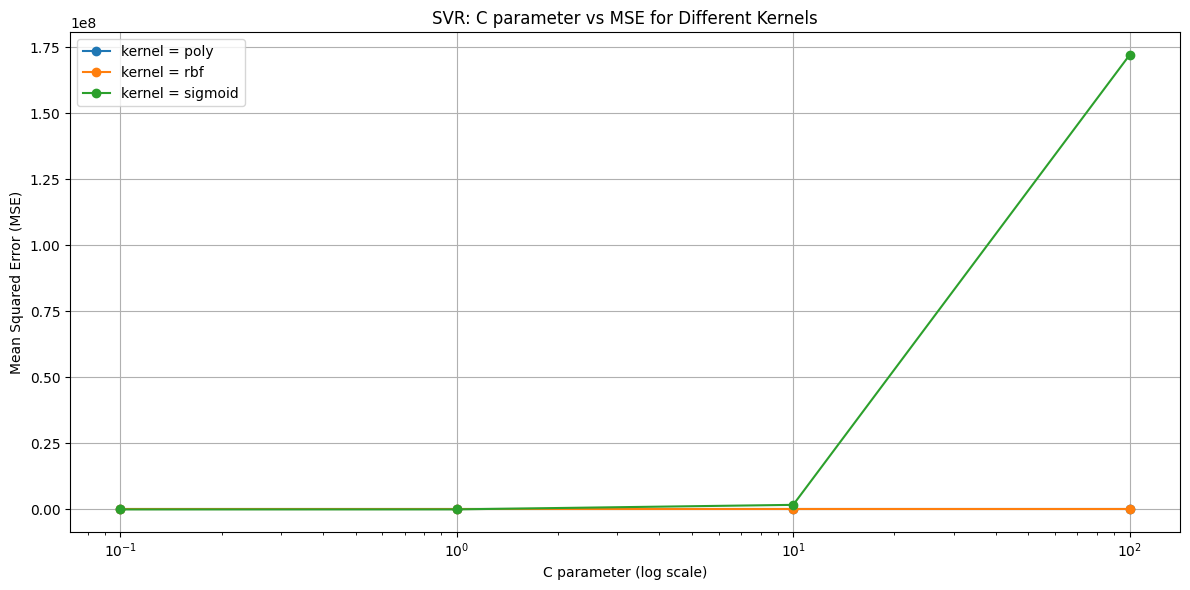

Best for poly: C=1, MSE=1.0360
Best for rbf: C=100, MSE=0.3159
Best for sigmoid: C=0.1, MSE=135.6326


In [63]:
C_range = [0.1, 1, 10, 100]
kernels = ['poly', 'rbf', 'sigmoid']
mse_results = {kernel: [] for kernel in kernels}

for kernel in kernels:
    mses = []
    for C in C_range:
        svr = SVR(C=C, kernel=kernel)
        svr.fit(X_reg_train, y_reg_train)
        y_pred = svr.predict(X_reg_test)
        mse = mean_squared_error(y_reg_test, y_pred)
        mses.append(mse)
    mse_results[kernel] = mses

plt.figure(figsize=(12, 6))
for kernel, mses in mse_results.items():
    plt.plot(C_range, mses, marker='o', linestyle='-', label=f'kernel = {kernel}')

plt.title('SVR: C parameter vs MSE for Different Kernels')
plt.xlabel('C parameter (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.tight_layout()
plt.show()

for kernel, mses in mse_results.items():
    best_idx = mses.index(min(mses))
    best_C = C_range[best_idx]
    best_mse = mses[best_idx]
    print(f"Best for {kernel}: C={best_C}, MSE={best_mse:.4f}")

**Conclusion:** 

The SVR plot demonstrates how the C parameter affects regression performance for different kernel functions. Just like in classification, C controls the penalty for error but in the context of regression. A smaller C leads to a wider margin of error tolerance but may result in underfitting, while a larger C enforces a stricter fit to the training data but may overfit. The performance differences among kernels reveal which transformation of the feature space works best for capturing the underlying patterns in our housing price data. The optimal combination of kernel and C parameter provides the best predictive performance by balancing the complexity of the model with its generalization ability.